<a href="https://colab.research.google.com/github/chunming1022/Computer-Graphics/blob/main/%E7%9B%B4%E7%BA%BF%E8%A3%81%E5%89%AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

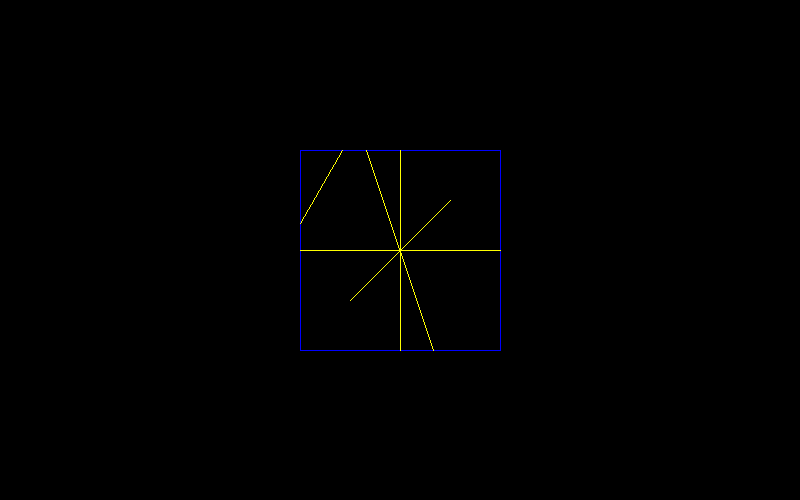

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

LEFT = 1
RIGHT = 2
BOTTOM = 4
TOP = 8

xl = 300
xr = 500
yb = 150
yt = 350  # 窗口的边界值

# Create a black image
img = np.zeros((500, 800, 3), np.uint8)  # 相当于建立画布


# 编码
def encode(x, y):
    c = 0
    if x < xl:
        c = c | LEFT
    if x > xr:
        c = c | RIGHT
    if y < yb:
        c = c | BOTTOM
    if y > yt:
        c = c | TOP
    return c


# cohen-sutherland 算法
def CohenSutherland(x1, y1, x2, y2):
    code1 = encode(x1, y1)
    code2 = encode(x2, y2)
    outcode = code1  # outcode是总在窗口外的那个端点
    x, y = 0, 0
    area = False  # 设置一个是否满足条件的区分标志
    while True:
        if (code2 | code1) == 0:
            area = True
            break
        if (code1 & code2) != 0:  # 简弃之
            break
        if code1 == 0:  # 开始求交点
            outcode = code2
        if (LEFT & outcode) != 0:  # 与窗口左边界相交
            x = xl
            y = y1 + (y2 - y1) * (xl - x1) / (x2 - x1)
        elif (RIGHT & outcode) != 0:
            x = xr
            y = y1 + (y2 - y1) * (xr - x1) / (x2 - x1)
        elif (BOTTOM & outcode) != 0:
            y = yb
            x = x1 + (x2 - x1) * (yb - y1) / (y2 - y1)
        elif (TOP & outcode) != 0:
            y = yt
            x = x1 + (x2 - x1) * (yt - y1) / (y2 - y1)
        x = int(x)  # 转换为整型
        y = int(y)
        if outcode == code1:
            # print('hhh')  # 测试用
            x1 = x
            y1 = y
            code1 = encode(x, y)
        else:
            # print('eee')
            x2 = x
            y2 = y
            code2 = encode(x, y)
    if area == True:  # 若满足条件即可划线
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 255))  # 这里传递的点的坐标必须是整型，否则出错
    return


def main():   # 主函数
    cv2.rectangle(img, (300, 150), (500, 350), 255)
    

    # 窗口裁剪直线        这里是显示裁剪之后的样子
    CohenSutherland(0, 0, 260, 260)  # 传递直线起点和终点坐标
    CohenSutherland(400, 50, 200, 400)
    CohenSutherland(350, 100, 450, 400)
    CohenSutherland(150, 250, 650, 250)
    CohenSutherland(400, 75, 400, 425)
    CohenSutherland(350, 300, 450, 200)
    # test()

    # 窗口显示图形
    cv2.imwrite('out1.jpg', img)  # 生成一张图片
    cv2_imshow(img)  # 显示图像


if __name__ == '__main__':
    main()
    # print('now __name__ is %s' % __name__)